<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/code/aula08a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

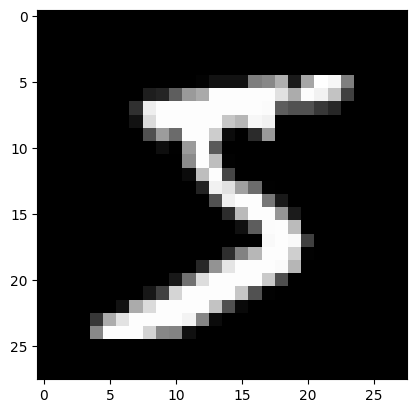

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [28]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [30]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [32]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [33]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.8757
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.9669
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9774
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0484 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9891


In [34]:
predicted = model.predict(test_images[0:1])
predicted[0]

array([2.0290214e-08, 2.9075781e-10, 1.5140382e-06, 3.0585711e-03,
       4.0686833e-13, 6.8917579e-08, 1.5813473e-14, 9.9693006e-01,
       6.7781366e-07, 9.1218808e-06], dtype=float32)

In [35]:
predicted[0].argmax()

7

In [36]:
predicted[0][7]

0.99693006

In [37]:
test_labels[0]

7

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9783
test_acc: 0.9782999753952026


In [39]:
from tensorflow.keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.8742
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1123 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9864
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9892


0.9785

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4316 - accuracy: 0.8732
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1175 - accuracy: 0.9657
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9892


0.9789

In [42]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4310 - accuracy: 0.8739
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1155 - accuracy: 0.9668
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0475 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9901


0.979

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.8744
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9662
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9860
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9895


0.9801

In [46]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4216 - accuracy: 0.8697
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0771 - accuracy: 0.9766
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0437 - accuracy: 0.9862
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0261 - accuracy: 0.9922
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9948


0.9841

In [48]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return np.array(X, dtype="float32") / 255

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8788
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0664 - accuracy: 0.9795
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0372 - accuracy: 0.9888
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0141 - accuracy: 0.9957


0.9848

In [49]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

def define_architecture(input_shape, output_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(output_shape, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
    self.validation_split=0.2

  def to_categorical(self ,y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    return yhot

  def fit(self, X, y):
    yhot = self.to_categorical(y)
    self.model = define_architecture(X.shape[1:], yhot.shape[1])
    self.model.compile(optimizer="rmsprop", 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])
    self.model.fit(X, yhot, 
                   epochs=self.epochs, 
                   batch_size=self.batch_size,
                   validation_split=self.validation_split)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return np.array(X, dtype="float32") / 255

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.5125 - accuracy: 0.8397 - val_loss: 0.0701 - val_accuracy: 0.9805
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0475 - val_accuracy: 0.9871
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0407 - val_accuracy: 0.9888


0.989